### Hypothesis testing 2:

* H0 (Null) CO2 impacts everyone irrespective of Co2 proximity
* Ha (alternate) Those countries with proximity to higher levels Co2 (i.e. <2000) are more impacted


* dataset1 = average temperatures change 1960-2010 fro countries with <=80% Co2 within 2000 miles
* dataset2 = average temperatures change 1960-2010 for countries with >80% Co2 within 2000 miles


* H0 = Mean (dataset 2) - Mean (dataset 1) = 0
* Ha = Mean (dataset 2) - Mean (dataset 1) > 0

NOTE: 
* average temperatures change is defined as the difference between first (1960) and last year (2012) in the dataset, divided by number of years.


### Load packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from scipy.stats import ttest_ind

### Load and clean data

In [3]:
# load dataset containing smoothed average temperatures
df = pd.read_csv('../data/ewma.csv', header=0, parse_dates=[0], squeeze=True)

In [4]:
df.head()

,ewma,observed,squared_error,Country,Year
0,25.16725,25.167250,0.000000,Bahamas,1960
1,25.286324999999998,25.383750,0.009492,Bahamas,1961
2,25.20723615591362,25.089583,0.013842,Bahamas,1962
3,25.188818665495045,25.151333,0.001405,Bahamas,1963
4,25.264992860784492,25.454167,0.035787,Bahamas,1964


In [5]:
# compute average temperature change
df_change = df[df.Year.isin(['1960', '2012'])] \
            .loc[:,['Country','Year', 'ewma']] \
            .pivot(index='Country', columns='Year', values='ewma')

In [6]:
df_change[1960] = pd.to_numeric(df_change[1960])
df_change[2012] = pd.to_numeric(df_change[2012])

In [7]:
# average temperatures change is defined as the difference between first (1960) and last year (2012) in the dataset, 
# divided by number of years.
df_change['AvgTempChange'] = (df_change[2012] - df_change[1960] ) / (2012 - 1960 + 1)
df_change.reset_index().to_csv('../data/df_avg_temp_change.csv', index=False)

In [8]:
# get a list of countries >80% Co2 within 2000 miles
df_co2 = pd.read_csv('../data/ADS_project_dataset2.csv', header=0, parse_dates=[0], squeeze=True)
df_total_co2prox2000 = df_co2.groupby('Country').CO2prox2000.sum().to_frame()
cutoff80pct = np.percentile(df_total_co2prox2000, 80)
df_change['flag80pctCO2'] = df_total_co2prox2000.CO2prox2000 >= cutoff80pct

In [9]:
# list countries >80% Co2 within 2000 miles
df_change[df_change['flag80pctCO2']]

Year,1960,2012,AvgTempChange,flag80pctCO2
Country,,,,
Algeria,23.504083,24.211963,0.013356,True
Bahamas,25.167250,25.790242,0.011755,True
Bangladesh,25.484250,25.519196,0.000659,True
Belize,25.351583,25.731637,0.007171,True
Cambodia,27.172417,27.372887,0.003782,True
Canada,-4.406833,-3.474706,0.017587,True
China,6.890917,7.513387,0.011745,True
Cuba,25.533833,26.056143,0.009855,True
Cyprus,19.935833,19.968461,0.000616,True


In [10]:
# get average temperature changes for countries >80% Co2 within 2000 miles
TempChange80plus = df_change[df_change['flag80pctCO2']].AvgTempChange

In [11]:
# get average temperature changes for countries <=80% Co2 within 2000 miles
TempChange80less = df_change[~df_change['flag80pctCO2']].AvgTempChange

### Visualization

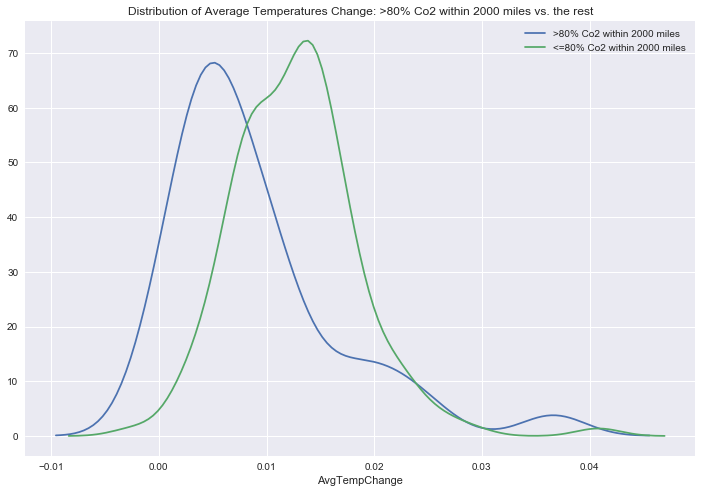

In [12]:
# compare distribution of average temperatures change between countries >80% Co2 within 2000 miles and the rest
plt.figure(figsize=(12,8))
plt.title('Distribution of Average Temperatures Change: >80% Co2 within 2000 miles vs. the rest')
sns.distplot(TempChange80plus, hist=False, label='>80% Co2 within 2000 miles')
sns.distplot(TempChange80less, hist=False, label='<=80% Co2 within 2000 miles');

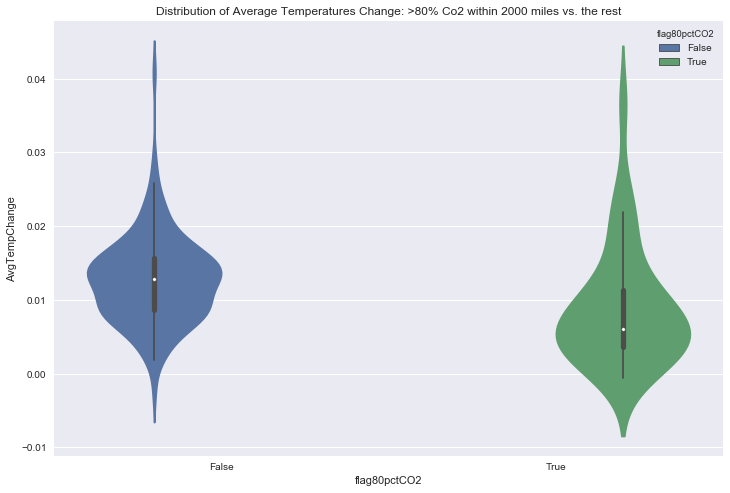

In [13]:
# compare distribution of temperatures in 1990 and 2010
plt.figure(figsize=(12,8))
plt.title('Distribution of Average Temperatures Change: >80% Co2 within 2000 miles vs. the rest')
sns.violinplot(x='flag80pctCO2', y='AvgTempChange', hue='flag80pctCO2', data=df_change);

### Hypothesis Testing

In [14]:
ttest_ind(TempChange80plus, TempChange80less)

Ttest_indResult(statistic=-3.2513339419030447, pvalue=0.001380763683512286)

** FINDINGS: **
* The observed p-value is less than 0.025 and we reject null hypothesis that there is no difference in average temperatures change for the period of 1960 - 2012 between countries with >80% Co2 within 2000 miles and the rest.
* However, test statistic of -3.25 suggests that, contorary to our alternative hypothesis, countries with >80% Co2 within 2000 miles experienced less average temperatures changes than the rest.